In [2]:
import pandas as pd
import random
from gensim.models import Word2Vec
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

In [3]:
df = pd.read_csv('clustered_articles2.csv')

In [4]:
df.head()

,Article Title,Cluster Label
0,plastic bag (drake song),0
1,david kristol,0
2,david leitch (settler),0
3,william j. curry (millionaire),0
4,ralph william frankland-payne-gallwey,0


In [5]:
df.size

35421292

In [6]:
article_titles = df['Article Title'].tolist()

In [7]:
article_titles[:11]

['plastic bag (drake song)',
 'david kristol',
 'david leitch (settler)',
 'william j. curry (millionaire)',
 'ralph william frankland-payne-gallwey',
 'follow me (antique song)',
 'denmark in the eurovision song contest',
 'back to bed (lydia song)',
 'william massot',
 'lemessurier, william',
 'william chip']

In [8]:
len(article_titles)

17710646

In [9]:
def create_groups(titles, group_size=20):
    groups = [titles[i:i + group_size] for i in range(0, len(titles), group_size)]
    
    if len(groups[-1]) != group_size:
        groups = groups[:-1]
    return groups

groups = create_groups(article_titles)

print(groups[:10])

[['plastic bag (drake song)', 'david kristol', 'david leitch (settler)', 'william j. curry (millionaire)', 'ralph william frankland-payne-gallwey', 'follow me (antique song)', 'denmark in the eurovision song contest', 'back to bed (lydia song)', 'william massot', 'lemessurier, william', 'william chip', 'black corridor (song)', 'the albatross (song)', 'william fletcher (politician)', 'knives out (song)', 'ur (alanis morissette song)', 'la isla (giusy ferreri song)', "can't raise a man (k.michelle song)", 'feather (katharine mcphee song)', 'join the club (hockey dad song)'], ['valentino (chris rea song)', 'david beynon', 'bathurst, william', 'a song for me', 'hivemind (slipknot song)', 'beside you (james blunt song)', 'tap (secret number song)', 'shine (waylon jennings song)', "keep doing what you're doing (song)", 'focused (john legend song)', 'the chain (fleetwood mac song)', 'fragile (song)', 'david lloyd (riflemaker and sportsman)', 'y.m.c.a. (song)', 'william koepsel', 'freshness (s

In [10]:
model = Word2Vec(sentences=groups, vector_size=75, window=10, min_count=1, sg=1, workers=4)
model.save("article_embeddings2.model")

In [11]:
model = Word2Vec.load("article_embeddings2.model")

In [12]:
def get_embedding(article_title):
    return model.wv[article_title]

embedding = get_embedding("manchester united")
print(embedding)

[-0.00993105  0.01115896 -0.01159709  0.00843282 -0.00790409  0.00663554
 -0.00124591 -0.01206903  0.00356814 -0.0004959  -0.00795909 -0.01063925
 -0.00736451  0.00012143  0.00657758 -0.00978554  0.00362235 -0.01021602
 -0.00663575  0.00420554  0.00517582  0.0103308  -0.01294153  0.00847195
  0.01286748  0.00534204 -0.00752333 -0.01112663  0.00900745 -0.00599273
  0.00311505  0.01009308  0.01046529 -0.00068474  0.00122601 -0.00223439
  0.00980395  0.00296611 -0.01113081  0.00391211 -0.0095684   0.00173772
  0.00788203  0.00070312  0.00255194 -0.00736781  0.00234205 -0.00583211
 -0.00958551  0.01003136 -0.00075851  0.00516224 -0.00365876 -0.00900438
  0.00240004  0.00030542 -0.00826005 -0.01066175  0.01237651 -0.00025826
  0.00563216 -0.00623878 -0.01018083 -0.01183938  0.00064988 -0.01030837
  0.01239917 -0.01073954 -0.01049617  0.01224895  0.00454252 -0.00359256
 -0.00028686 -0.01278053 -0.00835693]


In [13]:
from sklearn.neighbors import NearestNeighbors

def find_similar_articles(article_titles, top_n=5):
    valid_titles = [title for title in article_titles if title in model.wv]

    if not valid_titles:
        return []

    target_embeddings = np.array([get_embedding(title) for title in valid_titles])
    
    
    nbrs = NearestNeighbors(n_neighbors=top_n, algorithm='auto').fit(model.wv.vectors)
    distances, indices = nbrs.kneighbors(target_embeddings)
    
    similar_articles = []
    for i, indices_row in enumerate(indices):
        similar_articles_for_title = []
        for j, idx in enumerate(indices_row):
            title = model.wv.index_to_key[idx]
            if title not in article_titles:  
                similarity = 1 - distances[i, j]  
                similar_articles_for_title.append((title, similarity))
        similar_articles_for_title.sort(key=lambda x: x[1], reverse=True)
        similar_articles.append(similar_articles_for_title[:top_n])
    
    return similar_articles


recent_articles = article_titles[10001:10011]  
similar_articles = find_similar_articles(recent_articles)
print(f"recent articles = {recent_articles}")
print(f"Top 5 similar articles to the last 10 viewed articles: {similar_articles}")



recent articles = ['blue moon (hyolyn song)', 'isaacs, william', 'david baker (author)', 'when the bell tolls (song)', 'william farnum', 'tonight (blondie song)', 'william johnstone keswick', 'william c. koehler', 'peltro william tomkins', 'hibbett, david']
Top 5 similar articles to the last 10 viewed articles: [[('southern african music rights organization', 0.9381193034350872), ('list of people with surname hull', 0.9373575821518898), ('palaeolithic in south asia', 0.9372546672821045), ('serfontein', 0.9367959573864937)], [('bamanankan', 0.940062940120697), ('john bisset', 0.9396220333874226), ('new comet', 0.9389326237142086), ('co-variance', 0.9387770667672157)], [('hojai (vidhan sabha constituency)', 0.9378453455865383), ('rozyna, opole voivodeship', 0.9375567473471165), ('wideband voice', 0.9375404864549637), ('muniria lanceolata', 0.9371094107627869)], [('nocardia rugosa', 0.9396802149713039), ("you've got to change your mind", 0.9389865510165691), ('televisión de la frontera, s

In [16]:
from sklearn.neighbors import NearestNeighbors

def find_similar_articles(single_article_title, top_n=5):
    if single_article_title not in model.wv:
        return []

    target_embedding = get_embedding(single_article_title).reshape(1, -1)
    

    nbrs = NearestNeighbors(n_neighbors=top_n, algorithm='auto').fit(model.wv.vectors)
    distances, indices = nbrs.kneighbors(target_embedding)
    
    similar_articles = []
    for i, idx in enumerate(indices[0]):
        if i < len(distances[0]): 
            title = model.wv.index_to_key[idx]
            if title != single_article_title:
                similarity = 1 - distances[0, i]
                similar_articles.append((title, similarity))
    
    similar_articles.sort(key=lambda x: x[1], reverse=True)
    return similar_articles[:top_n]


article_title = "man"
similar_articles = find_similar_articles(article_title)
print(f"Similar articles to '{article_title}': {similar_articles}")


Similar articles to 'man': [('usuardus', 0.9360399544239044), ("people's guard wrn", 0.9346392527222633), ('industrial hygiene', 0.9341000095009804), ('1947 railway cup hurling championship', 0.9337622076272964)]


In [18]:
vocab = model.wv.key_to_index


In [19]:
len(vocab)

16771417

In [20]:
similar_articles = model.wv.most_similar("football")
similar_articles

[("it's enough (party)", 0.6184244751930237),
 ('table mound reservoir', 0.5816003084182739),
 ('feodor kuritsyn', 0.5505185127258301),
 ('lalla khadija of morocco', 0.5462422966957092),
 ('light trap', 0.545432984828949),
 ('exosporina fawcettii', 0.5449913144111633),
 ('chromodoris lentiginosa', 0.540023148059845),
 ("carpenter's coffee house", 0.5385943651199341),
 ('echorsis: sabunutan between good and evil', 0.5356879830360413),
 ('john smith (ohio politician born 1735)', 0.5302219986915588)]

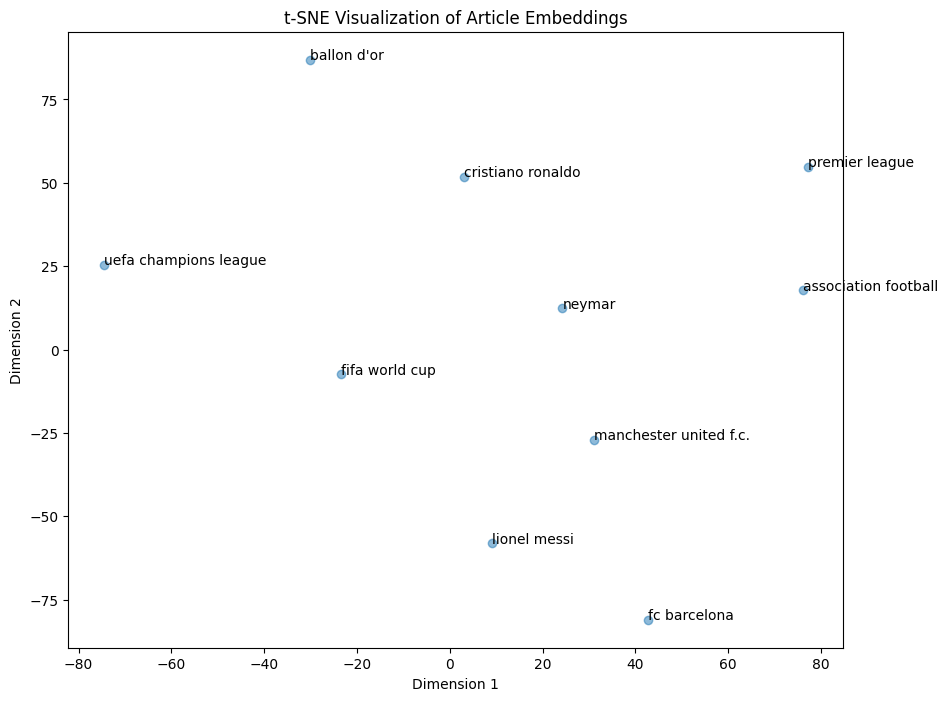

In [21]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

recent_articles = ["association football", "fifa world cup", "lionel messi", "cristiano ronaldo", "premier league", "uefa champions league", "manchester united f.c.", "fc barcelona", "ballon d'or", "neymar"]

embeddings = np.array([get_embedding(title) for title in recent_articles])


tsne = TSNE(n_components=2, perplexity=5 ,random_state=42)
embedded = tsne.fit_transform(embeddings)


plt.figure(figsize=(10, 8))
plt.scatter(embedded[:, 0], embedded[:, 1], alpha=0.5)
for i, article in enumerate(recent_articles):
    plt.annotate(article, (embedded[i, 0], embedded[i, 1]))
plt.title('t-SNE Visualization of Article Embeddings')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()


In [22]:
import gensim.downloader as api

wikipedia_model = api.load('glove-wiki-gigaword-300')


vocabulary = wikipedia_model.key_to_index  
embedding = wikipedia_model['football']    


print("Vocabulary size:", len(vocabulary))
print("Embedding dimension:", len(embedding))


Vocabulary size: 400000
Embedding dimension: 300


In [32]:
similar_articles = wikipedia_model.most_similar("india")
similar_articles

[('indian', 0.7355823516845703),
 ('pakistan', 0.7285580039024353),
 ('delhi', 0.6846906542778015),
 ('bangladesh', 0.620319128036499),
 ('lanka', 0.6095174551010132),
 ('sri', 0.6011614203453064),
 ('kashmir', 0.5746493935585022),
 ('nepal', 0.5421023368835449),
 ('pradesh', 0.5405810475349426),
 ('maharashtra', 0.518537700176239)]

In [81]:
def get_subword_embedding(subword):
    try:
        embedding = wikipedia_model[subword.lower()]
    except KeyError:
        embedding = np.zeros(wikipedia_model.vector_size)
    return embedding


In [82]:
def get_article_embedding(article_name):
    subwords = article_name.split()  
    subword_embeddings = [get_subword_embedding(subword) for subword in subwords]
    article_embedding = np.mean(subword_embeddings, axis=0)  
    return article_embedding

In [ ]:
article_embeddings = {}
article_titles_ref = [title for title in article_titles if isinstance(title, str)]

In [ ]:
article_names = article_titles
for article_name in article_names:
    article_embedding = get_article_embedding(article_name)
    article_embeddings[article_name] = article_embedding

In [71]:
len(article_embeddings)

16771422

In [ ]:
from sklearn.neighbors import NearestNeighbors
import numpy as np

def recommend_similar_articles(target_article_embedding, embeddings, article_titles, top_n=5):
    if target_article_embedding is None:
        return []

    
    nbrs = NearestNeighbors(n_neighbors=top_n+1, algorithm='auto', metric='cosine').fit(embeddings)

    
    distances, indices = nbrs.kneighbors([target_article_embedding])

    similar_articles = []
    for i, idx in enumerate(indices[0]):
        if i < len(distances[0]):  
            if not np.array_equal(embeddings[idx], target_article_embedding):  
                article_name = article_titles[idx]
                similarity = 1 - distances[0, i] 
                similar_articles.append((article_name, similarity))

    similar_articles.sort(key=lambda x: x[1], reverse=True)
    return similar_articles[:top_n]

target_article_name = "germany" 
target_article_embedding = get_article_embedding(target_article_name)
similar_articles = recommend_similar_articles(target_article_embedding, embeddings, article_titles)
print("Top 5 similar articles to", target_article_name, ":")
for article_name, similarity in similar_articles:
    print(article_name, "-", similarity)


Top 5 similar articles to germany :
sober (drugstore song) - 0.47481854898168663
never say never again (song) - 0.4436550734829159
goteo (paloma mami song) - 0.42321156201656285
adictiva (daddy yankee and anuel aa song) - 0.41439584450401445
often (robbie williams song) - 0.41295096215548566


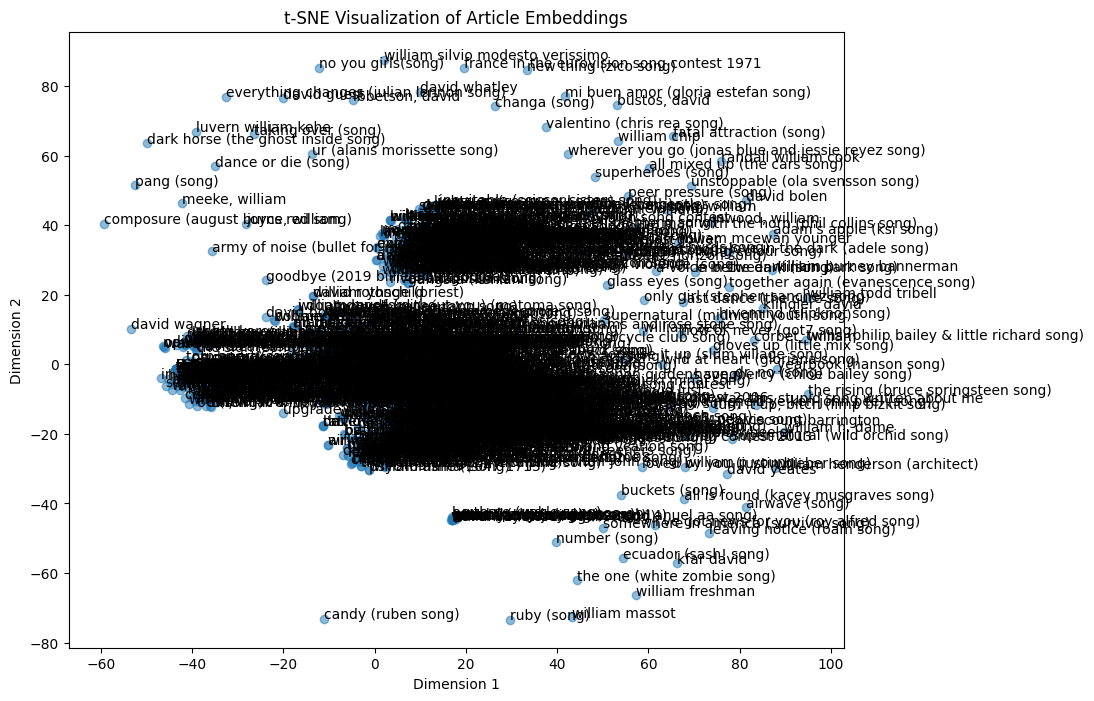

In [73]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE


embeddings_2d = np.array(embeddings)


tsne = TSNE(n_components=2, random_state=42, perplexity=10)
embeddings_2d = tsne.fit_transform(embeddings_2d)


plt.figure(figsize=(10, 8))
plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], alpha=0.5)
for i, article_name in enumerate(article_names):
    if i < len(embeddings_2d):  
        plt.annotate(article_name, (embeddings_2d[i, 0], embeddings_2d[i, 1]))
plt.title('t-SNE Visualization of Article Embeddings')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()
